
MNIST Dataset classificaiton
1.   DataLoader, Transformation
2.   Multilayer Neural Network, activation function
3.   Loss and optimizer
4.   Traning Loop (batch Training)
5.   Model Evaluation
6.   GPU support












In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [26]:
#hyper parameters
input_size = 784 # 28*28
hidden_size = 100
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [ ]:
#MNIST

train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.ToTensor(),
                                           download = True)

test_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = False,
                                           transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = False)

In [11]:
examples = iter(train_loader)

samples, lables = examples.next()
print(samples.shape, lables.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


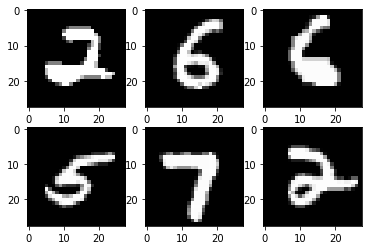

In [12]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap = 'gray')

plt.show()

In [13]:
1+1

2

In [19]:
 class NeuralNet(nn.Module):
     
     def __init__(self, input_size, hidden_size, num_classes):
         super(NeuralNet, self).__init__()
         self.l1 = nn.Linear(input_size, hidden_size)
         self.relu = nn.ReLU()
         self.l2 = nn.Linear(hidden_size, num_classes)
     def forward(self,x):

        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)

In [21]:
#loss and optmizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [27]:
#training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, lables) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        lables = lables.to(device)

        #forward
        output = model(images)
        loss = criterion(output, lables)

        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%100 == 0:
            print(f'Epoch {epoch+1}/ {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

#test

with torch.no_grad():
    n_correct = 0
    n_samples = 0

    for images, lables in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        lables = lables.to(device)
        output = model(images)


        # value, index 
        _, predictions = torch.max(output, 1)
        n_samples += lables.shape[0]
        n_correct += (predictions == lables).sum().item()
    acc = 100 * n_correct / n_samples
    print(f'accuracy = {acc}%') 






Epoch 1/ 10, step 100/600, loss = 0.1470
Epoch 1/ 10, step 200/600, loss = 0.1175
Epoch 1/ 10, step 300/600, loss = 0.1548
Epoch 1/ 10, step 400/600, loss = 0.0432
Epoch 1/ 10, step 500/600, loss = 0.0645
Epoch 1/ 10, step 600/600, loss = 0.1160
Epoch 2/ 10, step 100/600, loss = 0.0986
Epoch 2/ 10, step 200/600, loss = 0.1436
Epoch 2/ 10, step 300/600, loss = 0.1394
Epoch 2/ 10, step 400/600, loss = 0.0557
Epoch 2/ 10, step 500/600, loss = 0.0407
Epoch 2/ 10, step 600/600, loss = 0.0955
Epoch 3/ 10, step 100/600, loss = 0.0542
Epoch 3/ 10, step 200/600, loss = 0.0539
Epoch 3/ 10, step 300/600, loss = 0.0613
Epoch 3/ 10, step 400/600, loss = 0.0548
Epoch 3/ 10, step 500/600, loss = 0.0859
Epoch 3/ 10, step 600/600, loss = 0.0431
Epoch 4/ 10, step 100/600, loss = 0.0629
Epoch 4/ 10, step 200/600, loss = 0.0749
Epoch 4/ 10, step 300/600, loss = 0.0445
Epoch 4/ 10, step 400/600, loss = 0.0499
Epoch 4/ 10, step 500/600, loss = 0.0506
Epoch 4/ 10, step 600/600, loss = 0.0358
Epoch 5/ 10, ste